# Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

## Set-up environment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Data preparation and exploration

In [2]:
# get the data set of airlines names and codes from : Bureau of Transportation Statistics(USA)

df = pd.read_csv('tips.csv',sep=",",
                encoding = 'utf-8',
                low_memory = False,
                )

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.shape

(244, 7)

In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
df.day.nunique()

4

In [8]:
df.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [9]:
df.total_bill.mean()

19.785942622950824

In [10]:
df['tips%'] = round((df['tip']*100/ df['total_bill']-df['tip']),2)

In [11]:
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size,tips%
239,29.03,5.92,Male,No,Sat,Dinner,3,14.47
87,18.28,4.00,Male,No,Thur,Lunch,2,17.88
232,11.61,3.39,Male,No,Sat,Dinner,2,25.81
90,28.97,3.00,Male,Yes,Fri,Dinner,2,7.36


## Data Visualization

### MATPLOTLIB

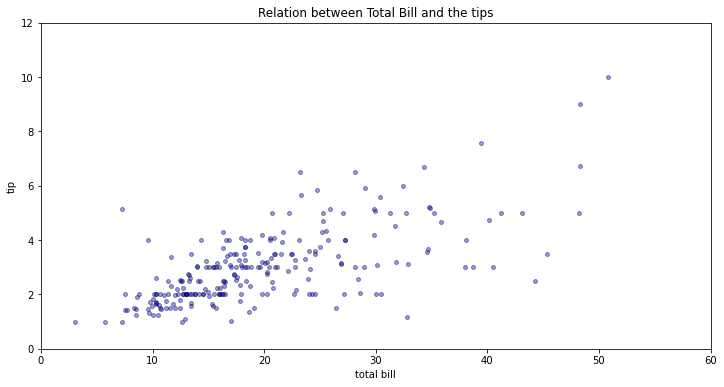

In [12]:

# Create data
x = df.total_bill
y = df.tip
colors = 'Blue'
area = np.pi*5

plt.figure(figsize=(12, 6))

plt.axis([0, 60, 0, 12])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Relation between Total Bill and the tips')
plt.ylabel('tip')
plt.xlabel('total bill')
plt.show()

In [13]:
# We group by Day and get the totals to compare the days

data_income = df.groupby(['day']).agg({'total_bill':[np.sum,np.mean],'tip':[np.sum,np.mean],'tips%':[np.mean]})

data_income

total_bill                tip                tips%
            sum       mean     sum      mean       mean
day                                                    
Fri      325.88  17.151579   51.96  2.734737  14.256842
Sat     1778.40  20.441379  260.40  2.993103  12.321494
Sun     1627.16  21.410000  247.39  3.255132  13.434474
Thur    1096.33  17.682742  171.83  2.771452  13.355000

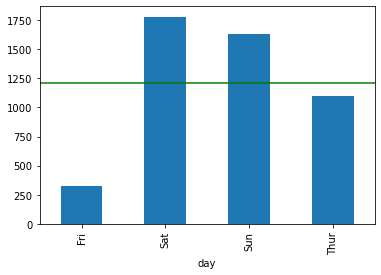

In [16]:
# We plot the totals, and we can see that Saturday is the day with the highest income 

data_income[('total_bill','sum')].plot(kind='bar')
plt.axhline(y=data_income[('total_bill','sum')].mean(),color = 'g')

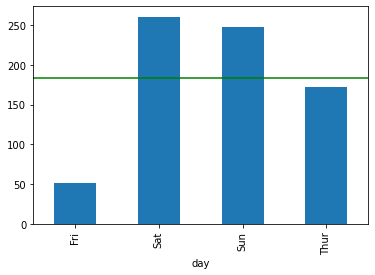

In [17]:
# plotting the tips total and we can see that Saturday too is the day with more tips.

data_income[('tip','sum')].plot(kind='bar')
plt.axhline(y=data_income[('tip','sum')].mean(),color = 'g')

In [20]:
#We group by the time .

data_time = df.groupby(['time']).agg({'total_bill':[np.sum],'tip':[np.sum],'tips%':[np.mean]})

data_time

,total_bill,tip,tips%
,sum,sum,mean
time,,,
Dinner,3660.30,546.07,12.848807
Lunch,1167.47,185.51,13.683676


<AxesSubplot:xlabel='time'>

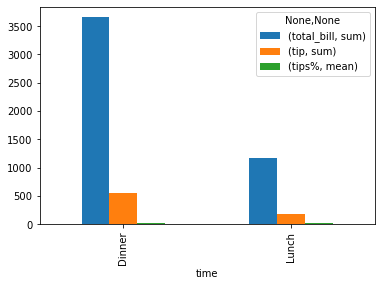

In [21]:
# after plotting , we can see that the restaurant works more in dinners than lunch Time

data_time.plot(kind='bar')

array([<AxesSubplot:ylabel='(total_bill, sum)'>,
       <AxesSubplot:ylabel='(tip, sum)'>,
       <AxesSubplot:ylabel='(tips%, mean)'>], dtype=object)

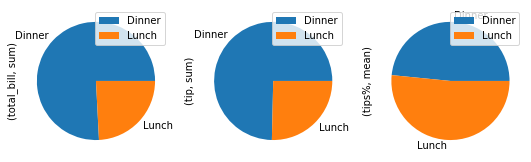

In [22]:
data_time.plot.pie(figsize=(9,6),subplots=True)

In [23]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [24]:
data_smoker = df.groupby(['smoker']).agg({'total_bill':[np.sum,np.mean],'tip':[np.sum,np.mean],'tips%':[np.mean]})
data_smoker

total_bill                tip                tips%
              sum       mean     sum      mean       mean
smoker                                                   
No        2897.43  19.188278  451.77  2.991854  12.940464
Yes       1930.34  20.756344  279.81  3.008710  13.310430

We can see that the smokers may give little bit more tips then not smokers. 

<AxesSubplot:xlabel='smoker'>

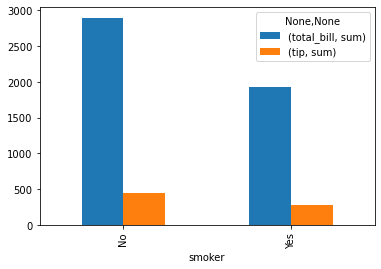

In [34]:
data_smoker.plot(kind='bar')

In [25]:
data_smoker = df.groupby(['sex']).agg({'total_bill':[np.sum,np.size],'tip':[np.sum],'tips%':[np.mean]})
data_smoker

total_bill          tip      tips%
              sum size     sum       mean
sex                                      
Female    1570.95   87  246.51  13.814828
Male      3256.82  157  485.07  12.675096

We can see that Females can give more tips then men

In [27]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [37]:
data_size = df.groupby(['size']).agg({'total_bill':[np.sum,np.size],'tip':[np.sum],'tips%':[np.mean]})
data_size 

total_bill          tip      tips%
            sum size     sum       mean
size                                   
1         28.97    4    5.75  20.290000
2       2565.89  156  402.84  13.989103
3        884.55   38  128.94  11.821579
4       1058.70   37  153.01  10.459459
5        150.34    5   20.14  10.124000
6        139.32    4   20.90  10.395000

We can see that when a person it's alone will be spend more.

<AxesSubplot:xlabel='size'>

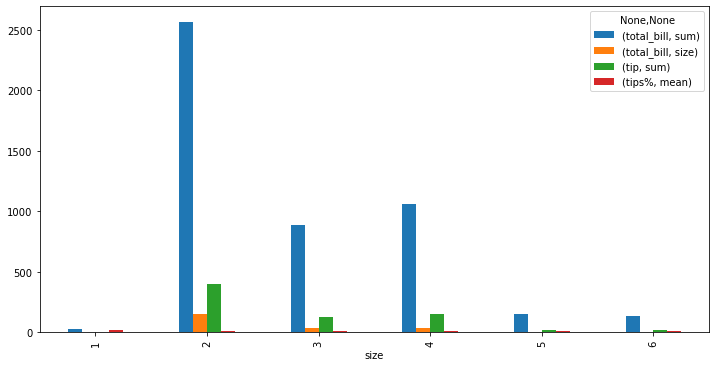

In [41]:
data_size.plot(kind='bar', figsize= (12,6))

### Viz with Seaborn

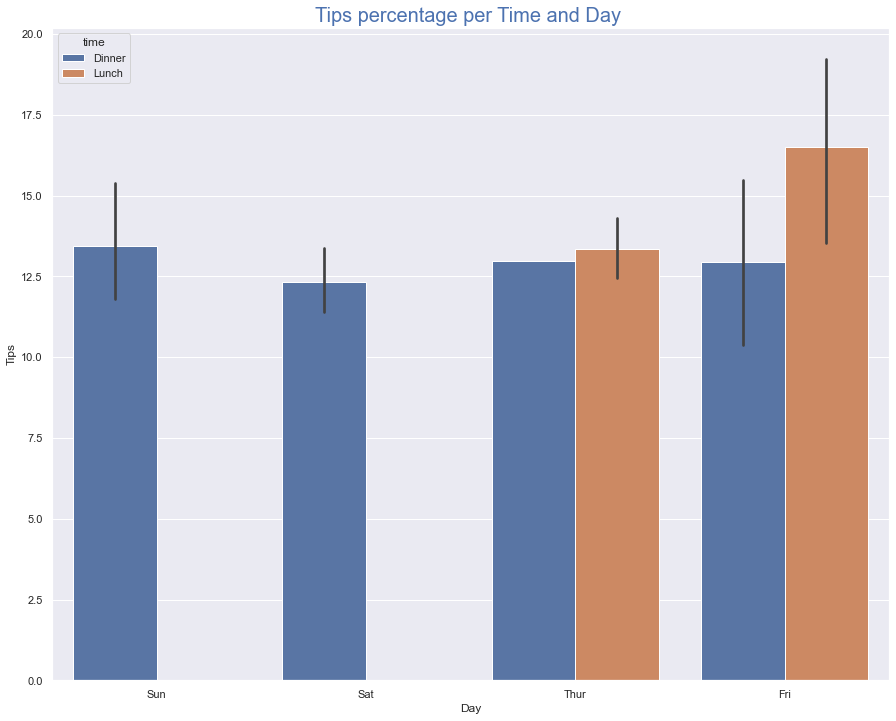

In [44]:
title = "Tips percentage per Time and Day "

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.barplot( x='day', y='tips%', hue='time', data=df)

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Day")
plt.ylabel("Tips")
plt.show()

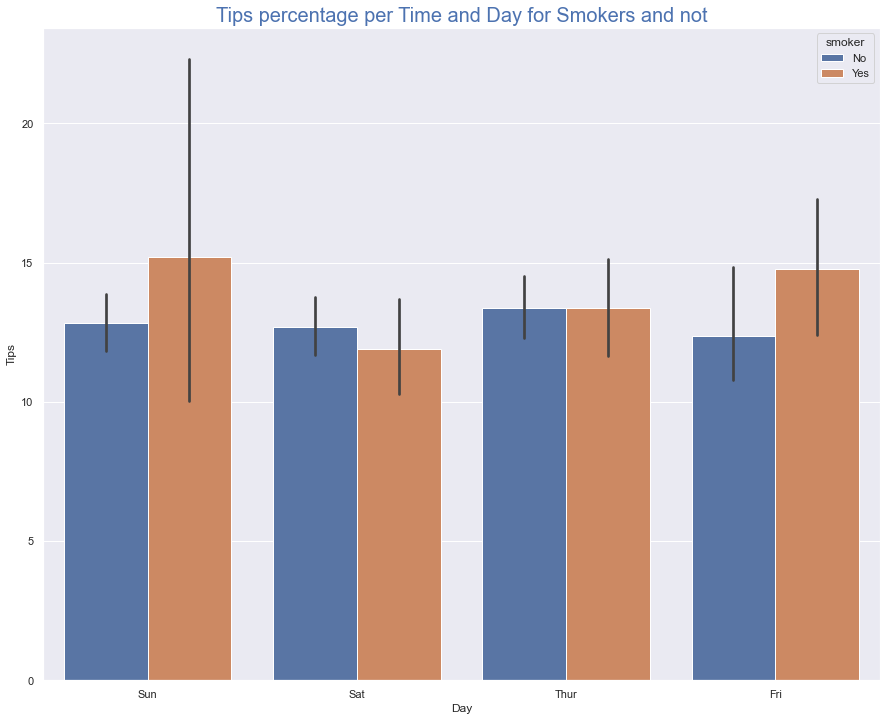

In [48]:
title = "Tips percentage per Time and Day for Smokers and not"

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.barplot( x='day', y='tips%', hue='smoker', data=df)

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Day")
plt.ylabel("Tips")
plt.show()


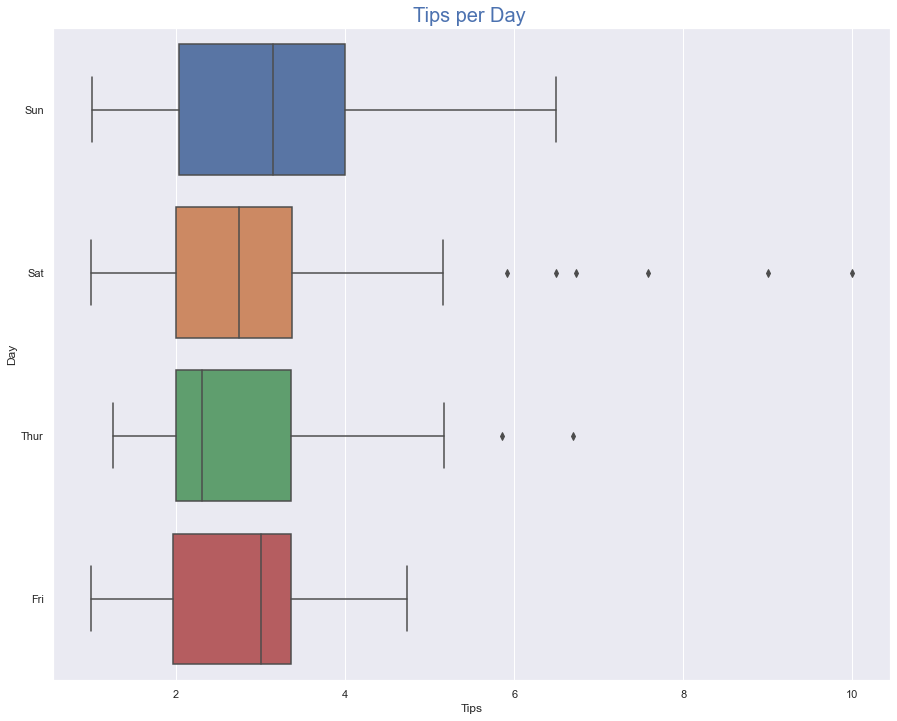

In [52]:
title = "Tips per Day "

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.boxplot(x="tip", y="day", data=df, orient="h")

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Tips")
plt.ylabel("Day")
plt.show()

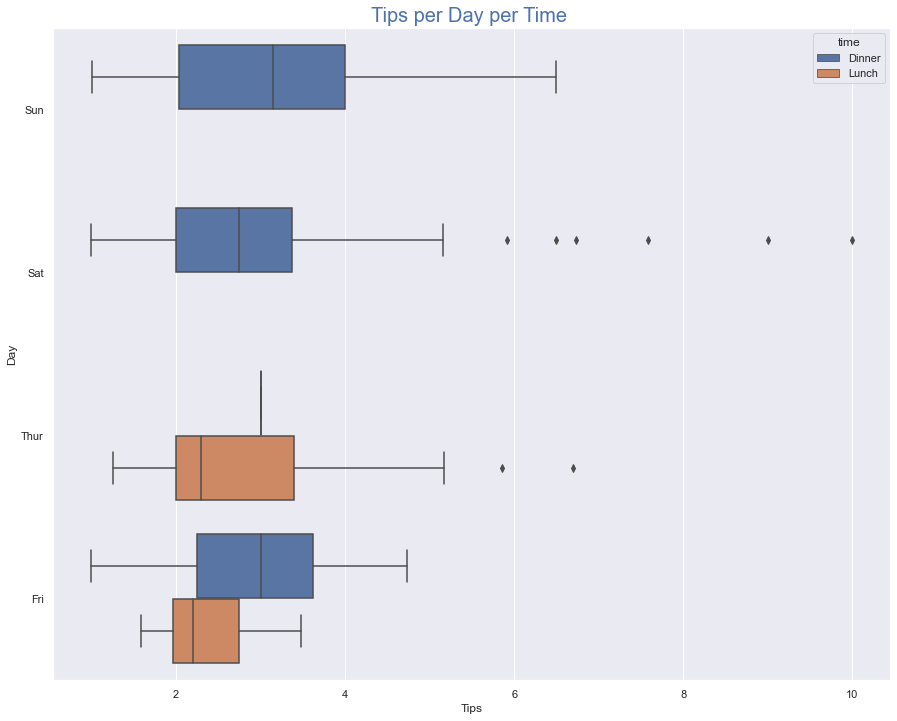

In [53]:
title = "Tips per Day per Time "

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.boxplot(x="tip", y="day", hue= 'time', data=df, orient="h")

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Tips")
plt.ylabel("Day")
plt.show()

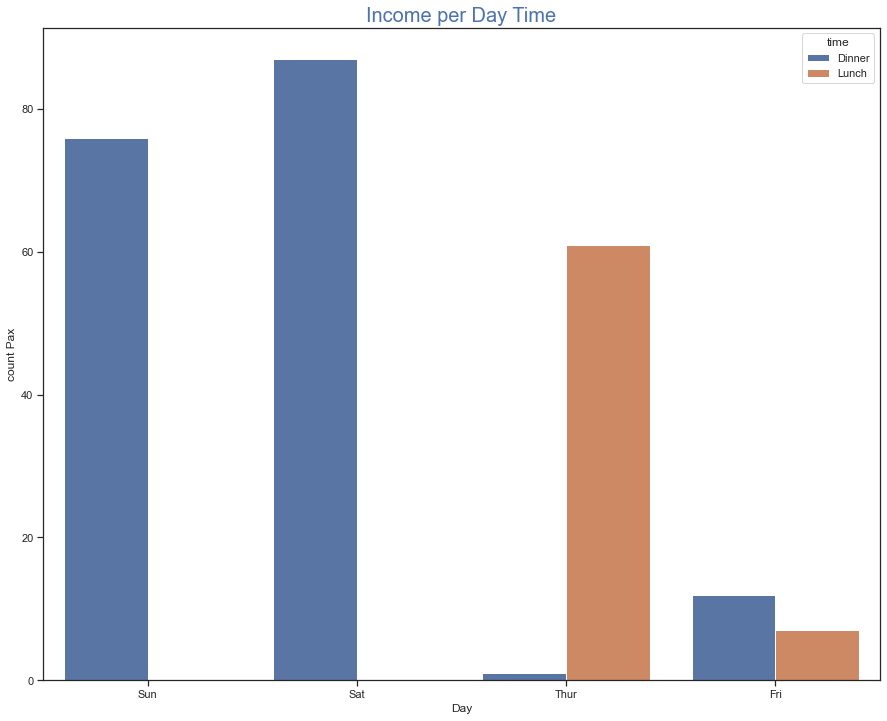

In [56]:
title = "Income per Day Time"

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.set_theme(style='ticks')
sns.countplot(x='day', hue= 'time', data = df)

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Day")
plt.ylabel("count Pax")
plt.show()

<Figure size 1080x864 with 0 Axes>

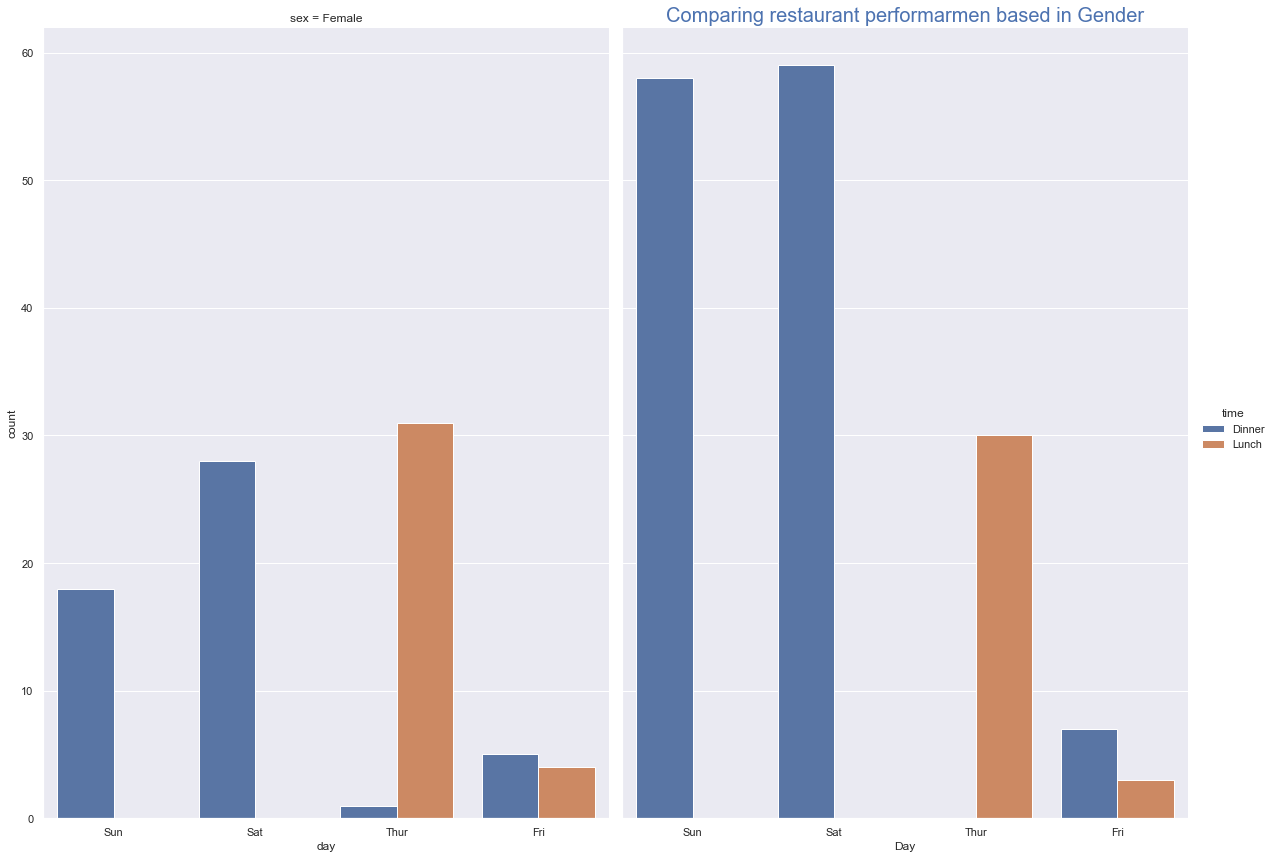

In [66]:
title = "Comparing restaurant performarmen based in Gender"

sns.set_theme()

figure = plt.figure(figsize = (15,12))

sns.catplot(x='day', hue='time', col='sex',
           data= df, kind="count",
           height=12,aspect=.7)

plt.title(title, fontsize = 20 , color ='b')
plt.xlabel("Day")
plt.ylabel("count Pax")
plt.show()


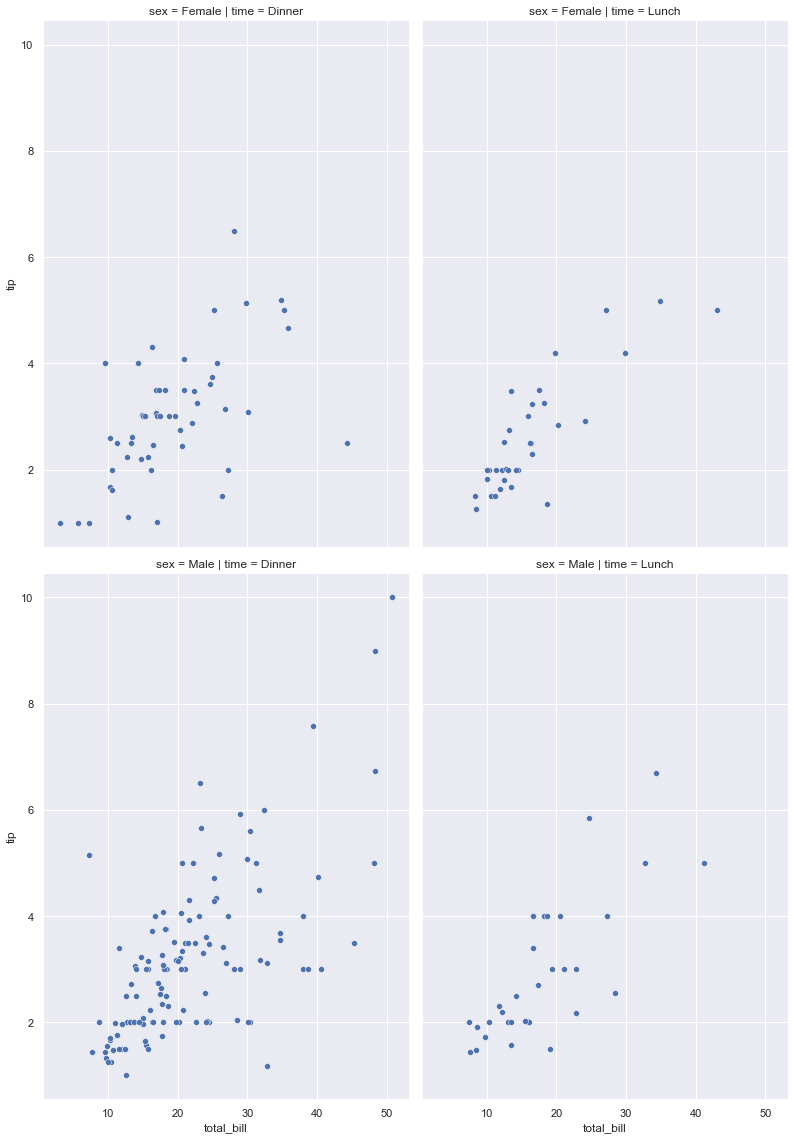

In [81]:
sns.set_theme()
g = sns.FacetGrid(df, col="time",  row="sex",height=8, aspect=0.7)
g.map(sns.scatterplot, "total_bill", "tip")

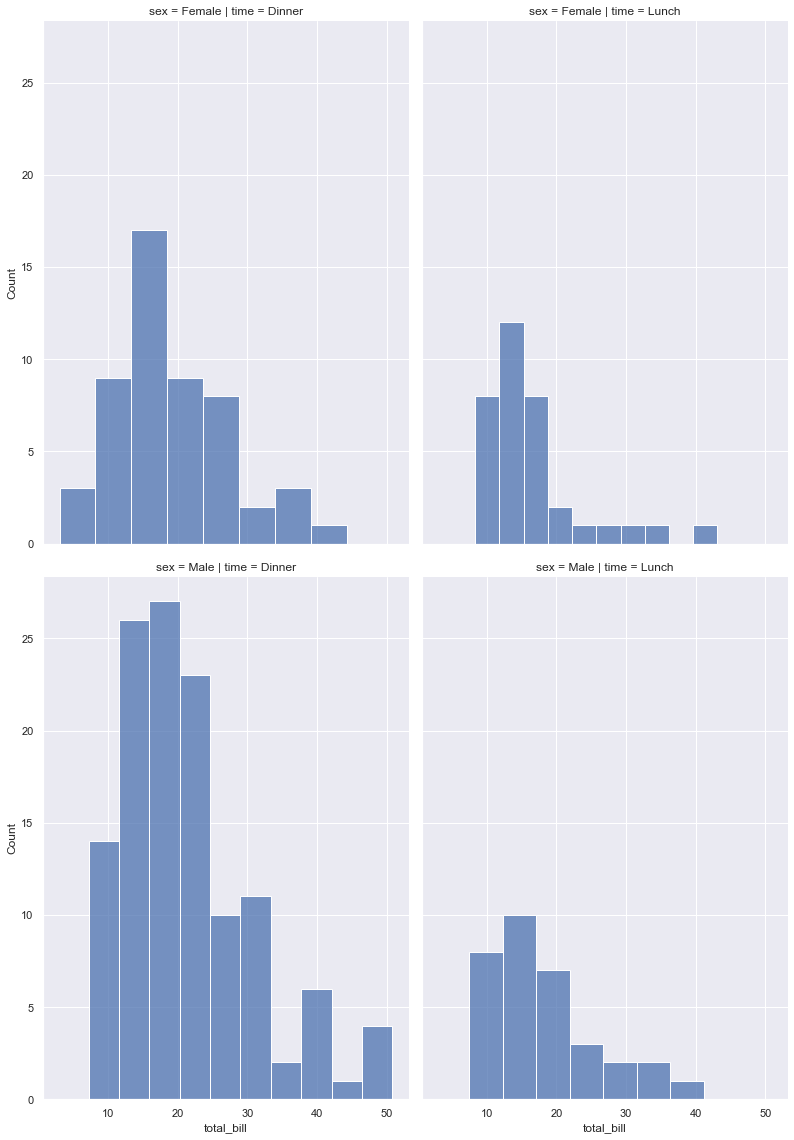

In [80]:
g = sns.FacetGrid(df, col="time",  row="sex",height=8, aspect=0.7)
g.map_dataframe(sns.histplot, x="total_bill")

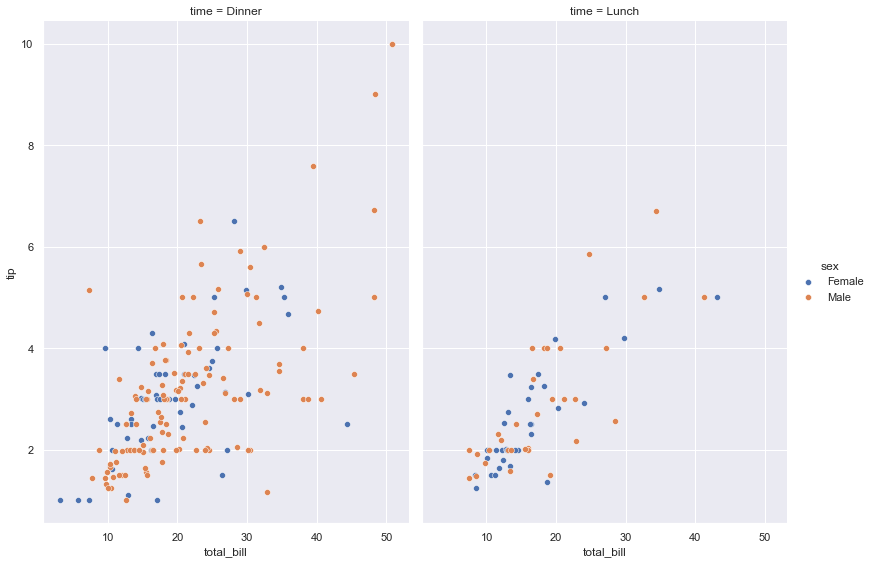

In [79]:
g = sns.FacetGrid(df, col="time", hue="sex",height=8, aspect=0.7)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

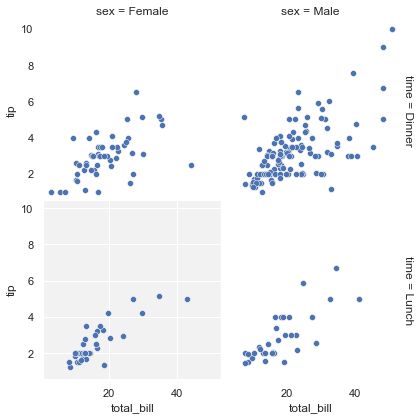

In [83]:
g = sns.FacetGrid(df, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == "Lunch" and col_val == "Female":
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))

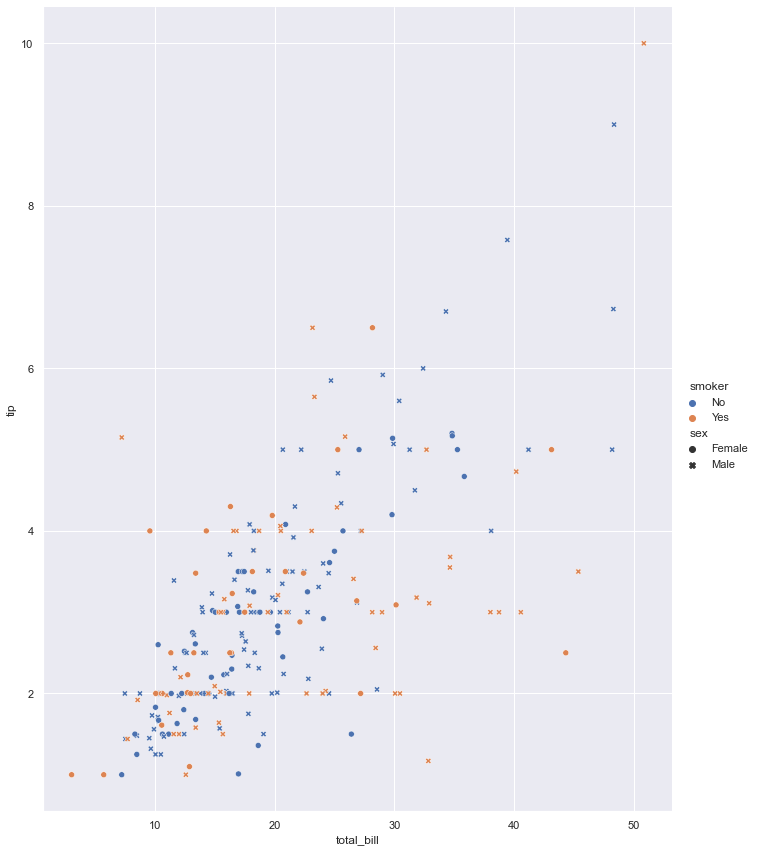

In [87]:


sns.relplot(x="total_bill", y="tip", hue="smoker",style='sex',height=12, aspect=0.8 , data=df)

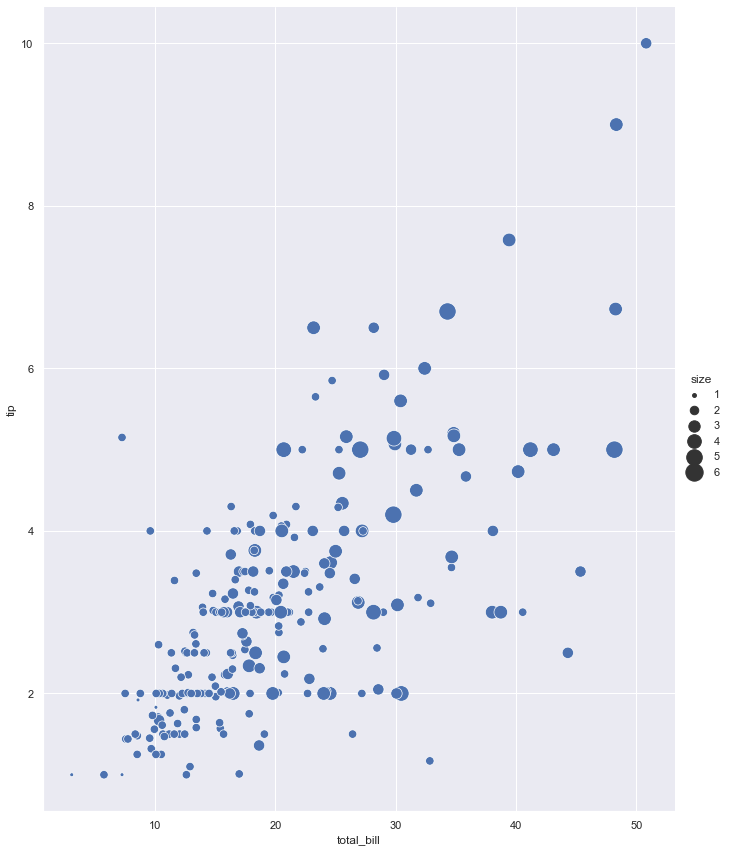

In [91]:
sns.relplot(x="total_bill", y="tip", size="size",sizes=(15,300),height=12, aspect=0.8, data=df);